In [84]:
#导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [85]:
#设置LSTM的时间窗
window=1
#读取数据
df1=pd.read_table("train-small.txt",sep=',',header=0)
df1=df1.iloc[:10000,1:]
df1.tail()

E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,Open,High,Low,Close,Volume
9994,1.22198,1.22226,1.22198,1.22226,386.8
9995,1.22210,1.22219,1.22203,1.22208,404.3
9996,1.22214,1.22230,1.22200,1.22223,939.1
9997,1.22230,1.22230,1.22203,1.22217,689.0
9998,1.22203,1.22229,1.22200,1.22229,610.9


In [86]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
input_size=len(df.iloc[1,:])

In [87]:
#调整列顺序
cols=list(df)
cols.insert(0,cols.pop(cols.index('Volume ')))
df=df[cols]

In [88]:
#构建LSTM模型的输入
stock=df
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.as_matrix() #pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度5+1
result = []
for index in range(len(data) - sequence_length):#循环170-5次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到161个样本，样本形式为6天*3特征
row = round(0.9 * result.shape[0])#划分训练集测试集
train = result[:int(row), :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

E:\anoconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [89]:
#建立LSTM模型 训练
d = 0.01
model = Sequential()
model.add(LSTM(64, input_shape=(window, input_size), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(16,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 100, batch_size = 200,validation_data=(X_test, y_test)) #训练模型1000次

E:\anoconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  
E:\anoconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  import sys
E:\anoconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 8997 samples, validate on 1000 samples
Epoch 1/100
8997/8997 [==============================] - 1s 105us/step - loss: 0.2117 - accuracy: 1.1115e-04 - val_loss: 0.3859 - val_accuracy: 0.0000e+00
Epoch 2/100
8997/8997 [==============================] - 0s 26us/step - loss: 0.0289 - accuracy: 1.1115e-04 - val_loss: 0.0107 - val_accuracy: 0.0010
Epoch 3/100
8997/8997 [==============================] - 0s 32us/step - loss: 0.0060 - accuracy: 1.1115e-04 - val_loss: 0.0056 - val_accuracy: 0.0010
Epoch 4/100
8997/8997 [==============================] - 0s 24us/step - loss: 0.0032 - accuracy: 1.1115e-04 - val_loss: 0.0017 - val_accuracy: 0.0010
Epoch 5/100
8997/8997 [==============================] - 0s 23us/step - loss: 0.0015 - accuracy: 1.1115e-04 - val_loss: 2.9899e-04 - val_accuracy: 0.0010
Epoch 6/100
8997/8997 [==============================] - 0s 23us/step - loss: 7.1400e-04 - accuracy: 1.1115e-04 - val_loss: 9.6646e-05 - val_accuracy: 0.0010
Epoch 7/100
8997/8997 [============

8997/8997 [==============================] - 0s 23us/step - loss: 9.8145e-05 - accuracy: 1.1115e-04 - val_loss: 8.4372e-05 - val_accuracy: 0.0010
Epoch 53/100
8997/8997 [==============================] - 0s 22us/step - loss: 9.6249e-05 - accuracy: 1.1115e-04 - val_loss: 8.6429e-05 - val_accuracy: 0.0010
Epoch 54/100
8997/8997 [==============================] - 0s 21us/step - loss: 9.6534e-05 - accuracy: 1.1115e-04 - val_loss: 9.2732e-05 - val_accuracy: 0.0010
Epoch 55/100
8997/8997 [==============================] - 0s 21us/step - loss: 9.6092e-05 - accuracy: 1.1115e-04 - val_loss: 8.8160e-05 - val_accuracy: 0.0010
Epoch 56/100
8997/8997 [==============================] - 0s 24us/step - loss: 9.4548e-05 - accuracy: 1.1115e-04 - val_loss: 7.7682e-05 - val_accuracy: 0.0010
Epoch 57/100
8997/8997 [==============================] - 0s 24us/step - loss: 9.5388e-05 - accuracy: 1.1115e-04 - val_loss: 1.0521e-04 - val_accuracy: 0.0010
Epoch 58/100
8997/8997 [==============================] - 0

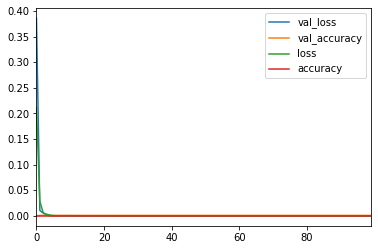

In [90]:
#画出迭代loss和acc曲线
pd.DataFrame(model.history.history).plot()

Text(0.5, 1.0, 'Train Data')

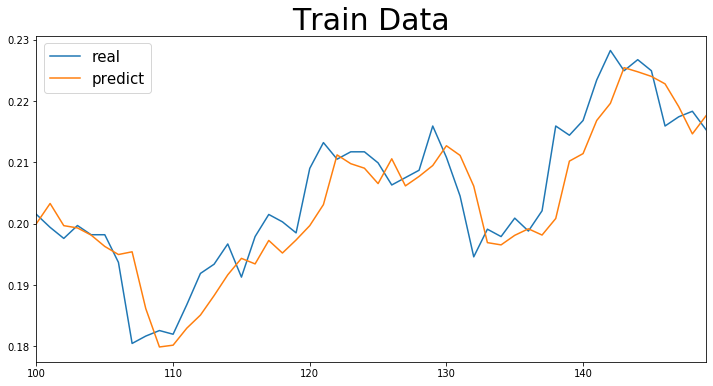

In [91]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:150,0].plot(figsize=(12,6))
draw.iloc[100:150,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

Text(0.5, 1.0, 'Test Data')

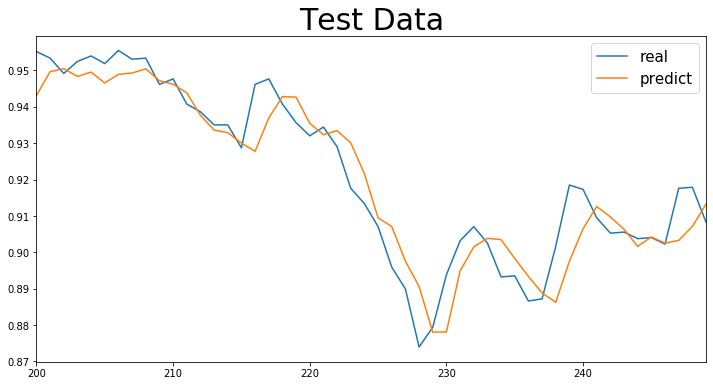

In [92]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[200:250,0].plot(figsize=(12,6))
draw.iloc[200:250,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [93]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,  y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)
print('训练时间（秒）:',54.56)

训练集上的MAE/MSE/MAPE
0.005499483640339445
5.8590830718440346e-05
2.2893008967559623
测试集上的MAE/MSE/MAPE
0.006091158946438909
7.363862208464315e-05
0.6853797211628617
预测涨跌正确: 0.5035035035035035
训练时间（秒）: 54.56
